In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as sio
import glob
from scipy.interpolate import interp1d
import sys
sys.path.append("./")
from env_list.simple2d import Simple2D, Sargolini2006, BasicSargolini2006

ModuleNotFoundError: No module named 'env_list'

In [ ]:
def get_2D_ratemap(time_array, spikes, x, y, x_size=50, y_size=50):
    x_spikes, y_spikes = [], []
    for s in spikes:
        array_pos = np.argmin(np.abs(time_array-s))
        x_spikes.append(x[array_pos])
        y_spikes.append(y[array_pos])
    x_spikes = np.array(x_spikes)
    y_spikes = np.array(y_spikes)
    h, binx, biny = np.histogram2d(x_spikes, y_spikes, bins=(x_size, y_size))
    return h.T, binx, biny

In [ ]:
def clean_data(data, keep_headers=False):
    # print(list(data.keys()))
    aux_dict = {}
    for key, val in data.items():
        if isinstance(val, bytes) or isinstance(val, str) or key=="__globals__":
            if keep_headers:
                aux_dict[key] = val
            continue
        else:
            if np.isnan(val).any():
                aux_dict[key] = val
            else:
                # Interpolate nans
                x_range = np.linspace(0, 1, num=len(val))
                nan_indexes = np.logical_not(np.isnan(val))[:, 0]
                clean_x = x_range[nan_indexes]
                clean_val = np.array(val)[nan_indexes, 0]
                f = interp1d(clean_x, clean_val, kind='cubic')
                aux_dict[key] = f(x_range)
    return aux_dict

In [ ]:
data_path = "experiment_data/Hafting2008/C43035A4-5CC5-44F2-B207-126922523FD9_1/"

data_path_list = glob.glob(data_path+"*.mat")

#The naming convention for the files is as follow
#Rat number - session number - file type (i.e: 11015-13120410_EEG)
mice_ids = np.unique([dp.split("/")[-1][:5] for dp in data_path_list])
session_per_animal = {}
cell_id_per_session = {}
for m_id in mice_ids:
    m_paths_list = glob.glob(data_path + m_id + "*.mat")
    sessions = np.unique([dp.split("/")[-1].split("-")[1][:8]  for dp in m_paths_list]).astype(str)
    session_per_animal[m_id] = {}
    for sess in sessions:
        s_paths_list = glob.glob(data_path + m_id + "-" + sess + "*.mat")
        cell_ids = np.unique([dp.split("/")[-1].split(".")[-2][-4:] for dp in s_paths_list]).astype(str)
        session_per_animal[m_id][sess] = {}
        for cell_id in cell_ids:
            r_path = s_paths_list = glob.glob(data_path + m_id + "-" + sess + "*" + cell_id + "*.mat")
            cleaned_data = clean_data(sio.loadmat(r_path[0]))
            session_per_animal[m_id][sess][cell_id] = cleaned_data
#Here we record for a specifique mice
recording_paths = sorted(glob.glob(data_path+mice_ids[0]+"-*.mat"))



In [2]:
mouse_data = {}
for r_path in recording_paths:
    trial_id = r_path.split(".")[0][-4:]
    print(trial_id)
    mouse_data[trial_id] = sio.loadmat(r_path)

NameError: name 'recording_paths' is not defined

In [3]:
best_session = {"rat": "11015", "sess": "13120410", "cell_id": "t5c1"}

{'EEG': array([-1., -1., 15., ..., 23., 16., 28.])}


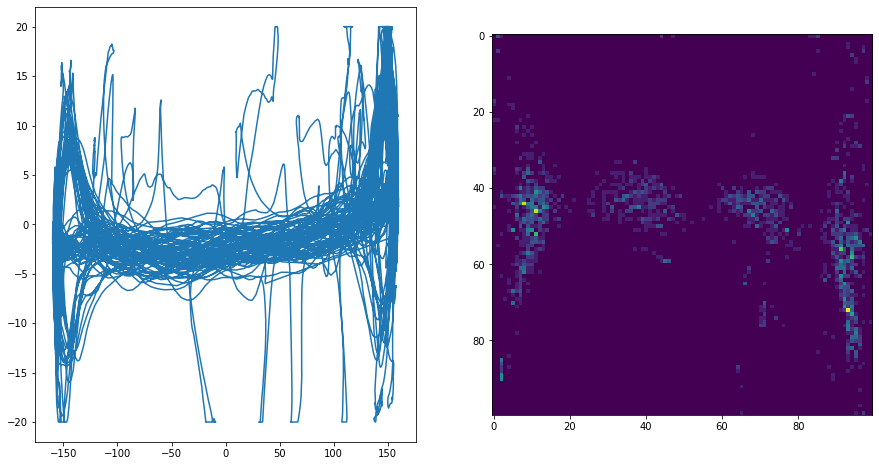

In [117]:
cell_data = session_per_animal[best_session["rat"]][best_session["sess"]]
first_cell_data = list(cell_data.values())[1]
x1, y1 = first_cell_data["posx"][:], first_cell_data["posy"][:]
# Selecting positional data
x = np.clip(x1, a_min=-200, a_max=200)
y = np.clip(y1, a_min=-20, a_max=20)

time_array = first_cell_data["post"][:]
first_cell_data = list(cell_data.values())[2]

test_spikes = first_cell_data["ts"][:]

f, ax = plt.subplots(1, 2, figsize=(15, 8))
ax = ax.flatten()
ax[0].plot(x, y)
print(single_cell_data)
h, binx, biny = get_2D_ratemap(time_array, test_spikes, x, y)
ax[i+1].imshow(h)
plt.show()


In [125]:
data_path = "Hafting2008/C43035A4-5CC5-44F2-B207-126922523FD9_1/"
session = {"rat": "11015", "sess": "13120410", "cell_id": "t5c1"}

env = Hafting2008(data_path = data_path,
                    verbose = True,
                    session = session,
                    time_step_size = None,
                    agent_step_size = None)

NameError: name 'Hafting2008' is not defined